In [26]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import plotly.express as px
import math
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [27]:
etsy = pd.read_excel('ETSYCLEAN.xlsx')
etsy.head()

,Unnamed: 0,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image,Sales Dummy
0,0,35865,"If you're planning a wedding, we invite you to...",46618,0,20,0,1,1,2008,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829,1,1
1,1,369750,Thank you all for a great 2022! We can't wait ...,40476,0,21,0,1,1,2008,zoeysattic,1,"St Louis, Missouri",5.0,5038,1,1
2,4,7283,Check out my new listings! More to come daily!...,2981,1,17,1,1,1,2007,1000WordPhotoShop,1,"Olympia, Washington",5.0,104,1,1
3,5,13691,"Fake Cakes, Ice Cream Cones, Fake Cupcakes & O...",11495,1,20,1,1,1,0,12LegsCuriosities,1,0,5.0,686,1,1
4,6,10408,I also sell under the name Stitch Morgantown o...,1444,1,15,1,1,1,2008,15PiecesofFlair,1,"Fairmont, West Virginia",5.0,934,1,1


In [28]:
etsy.describe()

,Unnamed: 0,Sales,Admirer,Badge,Category,Shipping,Review,Reply,Year,Announce,Rating,Total Items,Image,Sales Dummy
count,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.000000,5992.0,5992.000000,5992.000000,5992.000000,5992.000000
mean,3006.845461,10947.609479,4119.849633,0.422730,9.044393,0.574433,0.730307,0.488818,1479.659212,1.0,4.742573,287.527036,0.926235,0.500167
std,1734.684226,31462.842397,7408.086343,0.494035,5.643090,0.494470,0.443837,0.499917,884.019166,0.0,1.056544,1015.857588,0.261410,0.500042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,1505.750000,895.750000,462.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.0,5.000000,49.000000,1.000000,0.000000
50%,3006.500000,3148.000000,1615.500000,0.000000,9.000000,1.000000,1.000000,0.000000,2007.000000,1.0,5.000000,124.000000,1.000000,1.000000
75%,4510.250000,9402.750000,4469.000000,1.000000,13.000000,1.000000,1.000000,1.000000,2008.000000,1.0,5.000000,287.250000,1.000000,1.000000
max,6008.000000,950812.000000,142926.000000,1.000000,21.000000,1.000000,1.000000,1.000000,2010.000000,1.0,5.000000,67139.000000,1.000000,1.000000


,Unnamed: 0,Sales,Admirer,Badge,Category,Shipping,Review,Reply,Year,Rating,Total Items,Image,Sales Dummy
Unnamed: 0,1.000000,0.005000,-0.007418,0.004459,0.009095,0.012486,0.009057,-0.000992,-0.010628,0.009401,0.013000,-0.025082,0.006588
Sales,0.005000,1.000000,0.584491,0.105051,0.233178,0.126459,0.161452,0.095269,0.070831,0.077052,0.581718,0.048175,0.312866
Admirer,-0.007418,0.584491,1.000000,0.104738,0.196024,0.158316,0.213794,0.097035,0.175596,0.110913,0.324799,0.089040,0.405516
Badge,0.004459,0.105051,0.104738,1.000000,0.244851,0.676429,0.520025,0.852794,0.138289,0.206600,0.077215,0.105785,0.238565
Category,0.009095,0.233178,0.196024,0.244851,1.000000,0.275362,0.315541,0.251403,0.183412,0.257646,0.246960,0.141510,0.308067
Shipping,0.012486,0.126459,0.158316,0.676429,0.275362,1.000000,0.602584,0.545254,0.128277,0.272395,0.086564,0.104468,0.285846
Review,0.009057,0.161452,0.213794,0.520025,0.315541,0.602584,1.000000,0.513002,0.146883,0.392791,0.100074,0.111921,0.406332
Reply,-0.000992,0.095269,0.097035,0.852794,0.251403,0.545254,0.513002,1.000000,0.139050,0.230854,0.076387,0.100978,0.218353
Year,-0.010628,0.070831,0.175596,0.138289,0.183412,0.128277,0.146883,0.139050,1.000000,0.102369,0.025469,0.295470,0.142717
Rating,0.009401,0.077052,0.110913,0.206600,0.257646,0.272395,0.392791,0.230854,0.102369,1.000000,0.057854,0.099850,0.217686


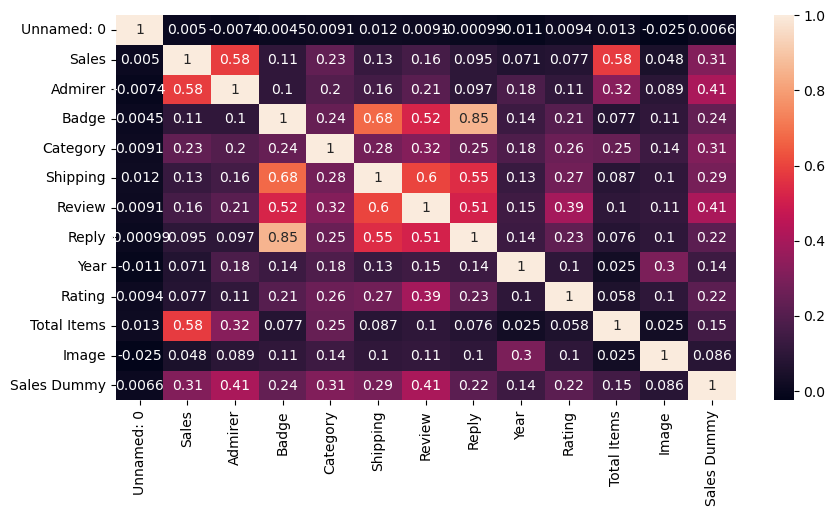

In [29]:
etsy_noannounce = etsy.drop(columns = 'Announce')
plt.figure(figsize=(10,5))
c = etsy_noannounce.corr()
sns.heatmap(c,annot=True)
c

In [30]:
by_join_date = etsy[['Year']].groupby(by='Year').size()

<AxesSubplot:title={'center':'Number of Shops by Year'}, xlabel='Year'>

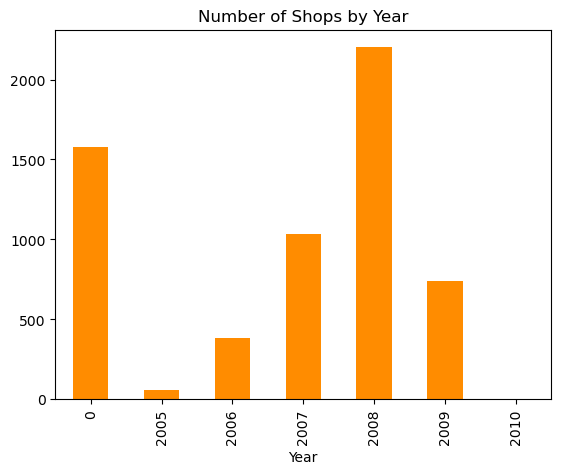

In [31]:
by_join_date.plot.bar(title='Number of Shops by Year', color='darkorange')

<AxesSubplot:title={'center':'Average Sales by Year'}, xlabel='Year'>

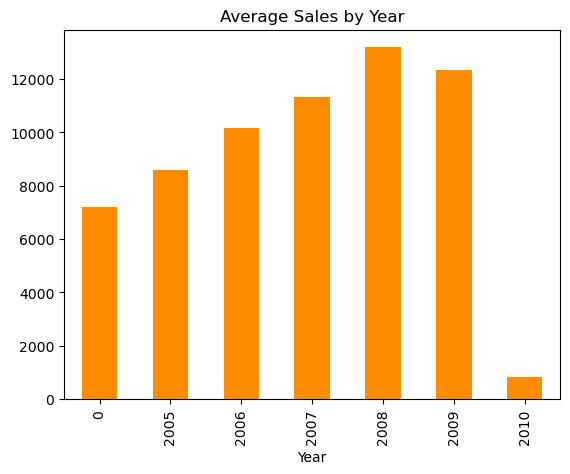

In [32]:
sales_by_year = etsy.groupby('Year')['Sales'].mean()
sales_by_year.plot.bar(title='Average Sales by Year', color='darkorange')

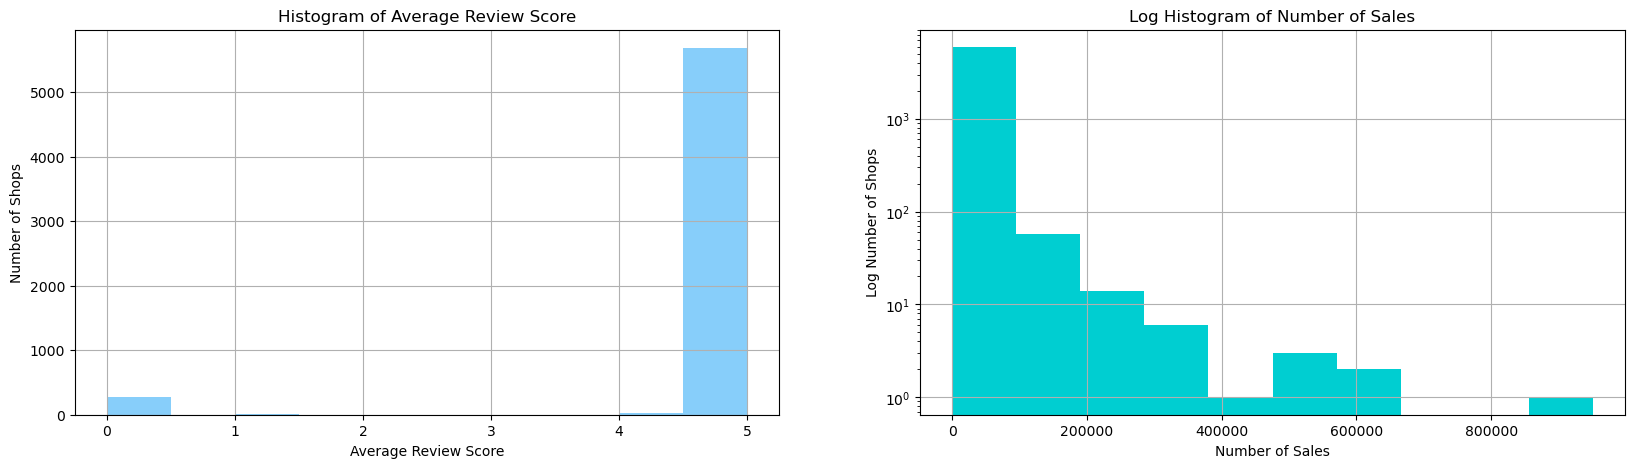

In [33]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
n, bins, patches = plt.hist(etsy['Rating'], log=False, facecolor='lightskyblue')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Shops')
plt.title('Histogram of Average Review Score')
plt.grid(True)

plt.subplot(122)
n, bins, patches = plt.hist(etsy['Sales'], log=True, facecolor='darkturquoise')
plt.xlabel('Number of Sales')
plt.ylabel('Log Number of Shops')
plt.title('Log Histogram of Number of Sales')
plt.grid(True)

plt.show()

In [34]:
etsy['Sold'] = etsy['Sales'] > 0
etsy.head()

,Unnamed: 0,Sales,Announcement,Admirer,Badge,Category,Shipping,Review,Reply,Year,Seller,Announce,Location,Rating,Total Items,Image,Sales Dummy,Sold
0,0,35865,"If you're planning a wedding, we invite you to...",46618,0,20,0,1,1,2008,jewelrybyjohan,1,"Oakdale, Minnesota",5.0,829,1,1,True
1,1,369750,Thank you all for a great 2022! We can't wait ...,40476,0,21,0,1,1,2008,zoeysattic,1,"St Louis, Missouri",5.0,5038,1,1,True
2,4,7283,Check out my new listings! More to come daily!...,2981,1,17,1,1,1,2007,1000WordPhotoShop,1,"Olympia, Washington",5.0,104,1,1,True
3,5,13691,"Fake Cakes, Ice Cream Cones, Fake Cupcakes & O...",11495,1,20,1,1,1,0,12LegsCuriosities,1,0,5.0,686,1,1,True
4,6,10408,I also sell under the name Stitch Morgantown o...,1444,1,15,1,1,1,2008,15PiecesofFlair,1,"Fairmont, West Virginia",5.0,934,1,1,True


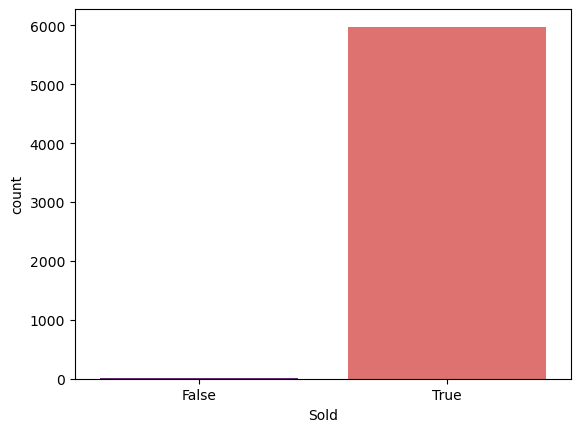

In [37]:
sns.countplot(x='Sold', data=etsy, palette='magma')
plt.show()

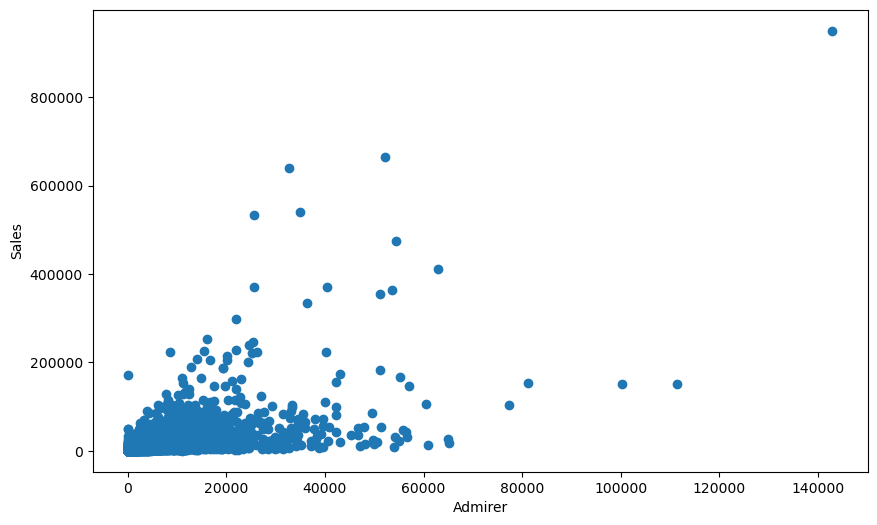

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(etsy['Admirer'], etsy['Sales'])
ax.set_xlabel('Admirer')
ax.set_ylabel('Sales')
plt.show()